In [178]:
%%html
<style>
table {float:left}
</style>

# Analyzing-Network-Traffic_kdd99 - EDA / Data Cleaning

Workflow:  using Jupyter notebooks as notes, along with a python class where functions will be written.

In [179]:
# my python files
import src.analytics as tics
import src.plotting_functions as pltfuncs
import src.transforms as trans

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import kendalltau
print(pltfuncs)
print(tics)

<module 'src.plotting_functions' from '/Users/tbot/Dropbox/0_galvanize/0_TODAY/Analyzing-Network-Traffic_kdd99/src/plotting_functions.py'>
<module 'src.analytics' from '/Users/tbot/Dropbox/0_galvanize/0_TODAY/Analyzing-Network-Traffic_kdd99/src/analytics.py'>


1- create gh repo
	- get .gitignore

2- create Jupyter Notebook for data

3- create a python class and import it into jupyter

--- commit

4- pull down the data into the repo
    - modify gitignore to ignore the data
--- commit

### write function to use bash to create samples from the data set

-- commit

In [180]:
# On OSX requires brew install coreutils, using gshuf instead of shuf
sample_name = 'data/sample_random_subset.csv'

tics.create_random_samples('data/kddcup.data', 700000, sample_name)

### Get some Initial metrics

In [181]:
# more imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### As the name list that accompanies the data set did not have all the field names, I cross referenced with a `sql` file at https://github.com/myui/hivemall/wiki/KDD-cup-1999-network-intrusion-dataset-%231 .  This matched the order displayed with the data set as well as with other tables out on the webs.

In [182]:
# Create list of column names
columns = ['duration',
           'protocol_type',
           'service',
           'flag',
           'src_bytes',
           'dst_bytes',
           'land',
           'wrong_fragment',
           'urgent',
           'hot',
           'num_failed_logins',
           'logged_in',
           'num_compromised',
           'root_shell',
           'su_attempted',
           'num_root',
           'num_file_creations',
           'num_shells',
           'num_access_files',
           'num_outbound_cmds',
           'is_host_login',
           'is_guest_login',
           'count',
           'srv_count',
           'serror_rate',
           'srv_serror_rate',
           'rerror_rate',
           'srv_rerror_rate',
           'same_srv_rate',
           'diff_srv_rate',
           'srv_diff_host_rate',
           'dst_host_count',
           'dst_host_srv_count',
           'dst_host_same_srv_rate',
           'dst_host_diff_srv_rate',
           'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate',
           'dst_host_serror_rate',
           'dst_host_srv_serror_rate',
           'dst_host_rerror_rate',
           'dst_host_srv_rerror_rate',
           'label']
df = pd.read_csv(sample_name, header=None)
# df = pd.read_csv('data/kddcup.data_10_percent')
df.columns = columns
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,18,0.07,0.07,0.0,0.0,0.0,0.0,1.0,1.0,neptune.
1,0,tcp,private,S0,0,0,0,0,0,0,...,7,0.03,0.09,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
2,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
3,0,tcp,http,SF,294,748,0,0,0,0,...,255,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,normal.
4,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


In [183]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,700000.000000,7.000000e+05,7.000000e+05,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,...,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,46.855059,3.434893e+03,6.471623e+02,0.000006,0.000627,0.000006,0.013203,0.000033,0.143591,0.004763,...,233.011676,189.018923,0.752961,0.030727,0.603884,0.006463,0.179141,0.178963,0.057803,0.057565
std,694.117420,1.711732e+06,1.637411e+04,0.002390,0.041726,0.002928,0.489233,0.007653,0.350675,1.334850,...,63.944036,106.005923,0.411595,0.108491,0.481262,0.041202,0.382717,0.383077,0.230661,0.230783
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.050000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,42837.000000,1.379964e+09,5.153771e+06,1.000000,3.000000,2.000000,33.000000,4.000000,1.000000,761.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 42 columns):
duration                       700000 non-null int64
protocol_type                  700000 non-null object
service                        700000 non-null object
flag                           700000 non-null object
src_bytes                      700000 non-null int64
dst_bytes                      700000 non-null int64
land                           700000 non-null int64
wrong_fragment                 700000 non-null int64
urgent                         700000 non-null int64
hot                            700000 non-null int64
num_failed_logins              700000 non-null int64
logged_in                      700000 non-null int64
num_compromised                700000 non-null int64
root_shell                     700000 non-null int64
su_attempted                   700000 non-null int64
num_root                       700000 non-null int64
num_file_creations             700000 

In [185]:
df['label'].value_counts()

smurf.              400517
neptune.            153768
normal.             139164
satan.                2292
ipsweep.              1799
portsweep.            1465
nmap.                  324
back.                  306
warezclient.           150
teardrop.              130
pod.                    50
buffer_overflow.        11
guess_passwd.            9
warezmaster.             4
rootkit.                 3
land.                    3
loadmodule.              2
spy.                     1
imap.                    1
multihop.                1
Name: label, dtype: int64

##### Observe uniques for each object type

In [186]:
unique_vals_per_column = tics.count_column_uniques(df)

for k, v in unique_vals_per_column.items():
    print('{}: {}\n'.format(k, v))


protocol_type: ['tcp', 'icmp', 'udp']

service: ['private', 'http', 'ecr_i', 'domain_u', 'ftp_data', 'other', 'auth', 'efs', 'printer', 'smtp', 'discard', 'eco_i', 'finger', 'telnet', 'netbios_ns', 'shell', 'hostnames', 'klogin', 'time', 'urp_i', 'ntp_u', 'ftp', 'urh_i', 'IRC', 'Z39_50', 'link', 'daytime', 'ldap', 'vmnet', 'sql_net', 'netbios_dgm', 'mtp', 'rje', 'systat', 'sunrpc', 'kshell', 'csnet_ns', 'domain', 'whois', 'echo', 'nnsp', 'ctf', 'login', 'gopher', 'courier', 'remote_job', 'uucp_path', 'exec', 'nntp', 'bgp', 'imap4', 'uucp', 'supdup', 'netbios_ssn', 'name', 'pop_2', 'netstat', 'ssh', 'iso_tsap', 'http_443', 'pop_3', 'X11', 'pm_dump', 'red_i', 'tim_i', 'tftp_u']

flag: ['REJ', 'S0', 'SF', 'RSTO', 'S3', 'SH', 'RSTR', 'S1', 'S2', 'OTH', 'RSTOS0']

label: ['neptune.', 'normal.', 'smurf.', 'satan.', 'ipsweep.', 'nmap.', 'land.', 'portsweep.', 'back.', 'warezclient.', 'teardrop.', 'pod.', 'buffer_overflow.', 'guess_passwd.', 'warezmaster.', 'rootkit.', 'loadmodule.', 'spy.', '

##### Count number of zero values in each column

The motivation here is to see if which of the features are contributing little to the y

In [187]:
zero_counts = tics.count_zeros_ratio(df)
zero_counts

{'count': [1.4285714285714286e-06, 1],
 'dst_bytes': [0.8296628571428571, 580764],
 'dst_host_count': [1.4285714285714286e-06, 1],
 'dst_host_srv_count': [1.4285714285714286e-06, 1],
 'duration': [0.9756985714285714, 682989],
 'flag': [0.0, 0],
 'hot': [0.9983071428571428, 698815],
 'is_guest_login': [0.99913, 699391],
 'is_host_login': [1.0, 700000],
 'label': [0.0, 0],
 'land': [0.9999942857142857, 699996],
 'logged_in': [0.8564085714285714, 599486],
 'num_access_files': [0.9991171428571428, 699382],
 'num_compromised': [0.9994185714285714, 699593],
 'num_failed_logins': [0.9999757142857143, 699983],
 'num_file_creations': [0.9994957142857143, 699647],
 'num_outbound_cmds': [1.0, 700000],
 'num_root': [0.9988485714285714, 699194],
 'num_shells': [0.9999371428571429, 699956],
 'protocol_type': [0.0, 0],
 'root_shell': [0.9999342857142857, 699954],
 'service': [0.0, 0],
 'src_bytes': [0.23628, 165396],
 'srv_count': [1.4285714285714286e-06, 1],
 'su_attempted': [0.99998, 699986],
 'urg

In [188]:
print(tics.count_zeros_message(df))

At 700000 samples:
   num_outbound_cmds has only zero values
   is_host_login has only zero values



```
At 1000 samples:
   land has only zero values
   urgent has only zero values
   num_failed_logins has only zero values
   root_shell has only zero values
   su_attempted has only zero values
   num_root has only zero values
   num_shells has only zero values
   num_access_files has only zero values
   num_outbound_cmds has only zero values
   is_host_login has only zero values

At 10000 samples:
   land has only zero values
   urgent has only zero values
   num_failed_logins has only zero values
   root_shell has only zero values
   su_attempted has only zero values
   num_shells has only zero values
   num_outbound_cmds has only zero values
   is_host_login has only zero values
   
At 50000 samples:
   su_attempted has only zero values
   num_outbound_cmds has only zero values
   is_host_login has only zero values
   
At 250000 samples:
   urgent has only zero values
   num_outbound_cmds has only zero values
   is_host_login has only zero values
 
At 500000 samples:
   num_outbound_cmds has only zero values
   is_host_login has only zero values
   
At 700000 samples:
   num_outbound_cmds has only zero values
```

### Some Histograms

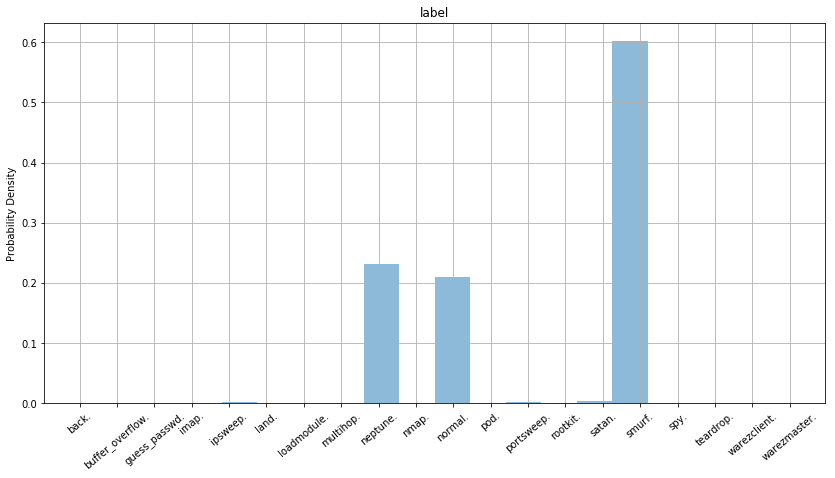

In [189]:
pltfuncs.plot_hist_basic(df, 'label')

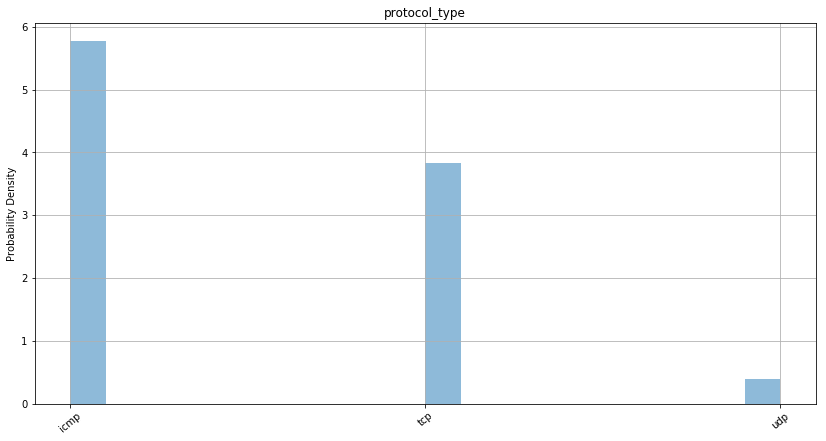

In [190]:
pltfuncs.plot_hist_basic(df, 'protocol_type')

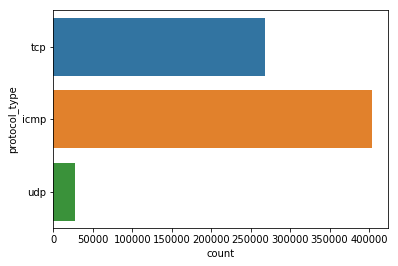

In [191]:
sns_plt = sns.countplot(y=df["protocol_type"])

In [204]:
df['protocol_type'].value_counts()

icmp    404124
tcp     268044
udp      27832
Name: protocol_type, dtype: int64

### ICMP
(from wikipedia): is used by network devices, including routers, to send error messages and operational information indicating, for example, that a requested service is not available or that a host or router could not be reached. ICMP differs from transport protocols such as TCP and UDP in that it is not typically used to exchange data between systems, nor is it regularly employed by end-user network applications


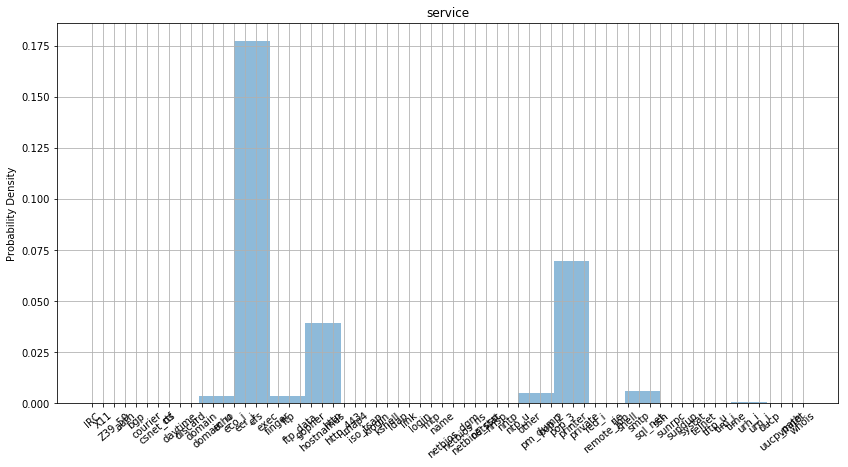

In [193]:
pltfuncs.plot_hist_basic(df, 'service')

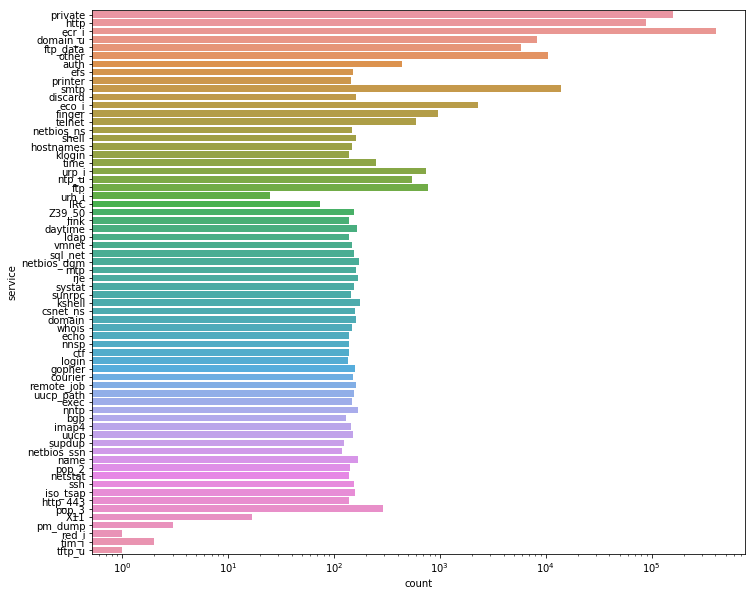

In [194]:
dims = (11.7, 10)
fig, ax = plt.subplots(figsize=dims)

g = sns.countplot(ax=ax,
                        y=df["service"])
ax.set_xscale('log')


In [195]:
df['service'].value_counts()

ecr_i          401045
private        157910
http            89102
smtp            13850
other           10428
domain_u         8267
ftp_data         5868
eco_i            2306
finger            971
ftp               773
urp_i             745
telnet            600
ntp_u             547
auth              436
pop_3             291
time              249
kshell            175
netbios_dgm       173
name              170
rje               169
nntp              168
daytime           167
domain            163
remote_job        163
mtp               162
shell             161
discard           161
csnet_ns          160
gopher            158
iso_tsap          158
                ...  
efs               153
uucp              152
netbios_ns        149
whois             149
hostnames         149
vmnet             149
exec              149
sunrpc            146
printer           146
imap4             144
pop_2             141
link              140
http_443          140
ctf               140
nnsp      

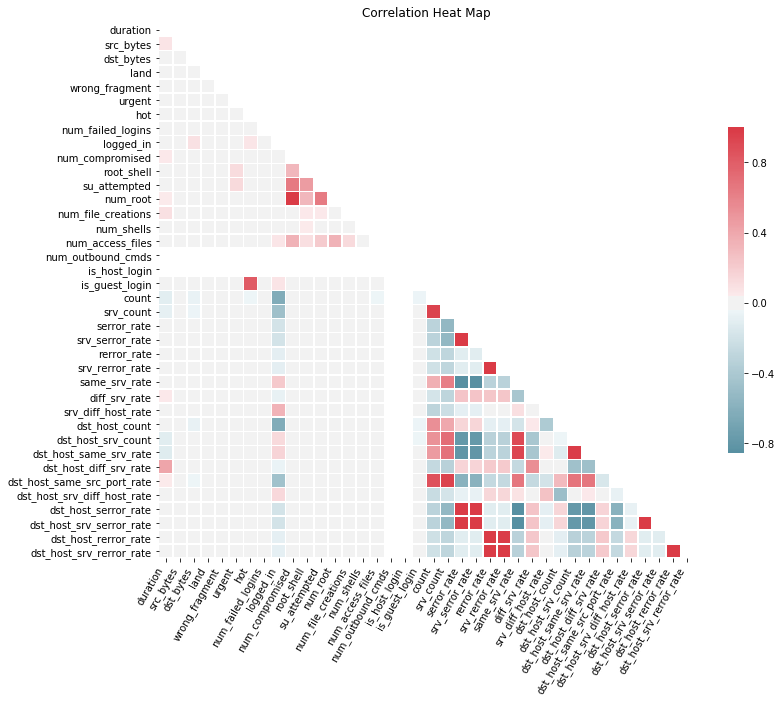

In [196]:
pltfuncs.corr_heat(df)

In [197]:
df.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.076528,0.006441,-0.000161,-0.001015,0.000864,0.003590,0.008721,-0.021208,0.050172,...,0.010880,-0.118326,-0.119907,0.416423,0.043688,-0.008882,-0.030929,-0.030812,0.007381,0.013255
src_bytes,0.076528,1.000000,0.000420,-0.000005,-0.000028,-0.000004,0.000287,-0.000008,-0.000254,0.000005,...,-0.003971,-0.002643,-0.002527,0.001205,-0.001500,-0.000123,-0.000936,-0.000934,-0.000083,0.005187
dst_bytes,0.006441,0.000420,1.000000,-0.000094,-0.000594,0.001052,0.004732,0.003153,0.090659,0.030301,...,-0.067694,0.004977,0.010493,-0.006768,-0.041842,0.017247,-0.017280,-0.017190,-0.008460,-0.008201
land,-0.000161,-0.000005,-0.000094,1.000000,-0.000036,-0.000005,-0.000065,-0.000010,-0.000979,-0.000009,...,-0.008402,-0.004184,-0.001193,0.001471,-0.000280,0.019641,0.002301,0.003751,-0.000262,-0.000596
wrong_fragment,-0.001015,-0.000028,-0.000594,-0.000036,1.000000,-0.000029,-0.000406,-0.000065,-0.006154,-0.000054,...,-0.002004,-0.018661,-0.017244,0.022539,-0.010092,0.006002,-0.006077,-0.007022,0.009327,-0.003749
urgent,0.000864,-0.000004,0.001052,-0.000005,-0.000029,1.000000,0.000945,-0.000008,0.004767,0.003649,...,-0.003190,-0.003361,-0.001164,-0.000373,-0.001435,0.016274,-0.000914,-0.000912,-0.000489,-0.000487
hot,0.003590,0.000287,0.004732,-0.000065,-0.000406,0.000945,1.000000,0.005226,0.065549,0.001951,...,-0.036428,-0.034169,-0.025686,0.009525,-0.031860,-0.002576,-0.012327,-0.012420,-0.004888,-0.005712
num_failed_logins,0.008721,-0.000008,0.003153,-0.000010,-0.000065,-0.000008,0.005226,1.000000,0.001436,0.027253,...,-0.008566,-0.006682,-0.003006,0.001967,-0.005135,-0.000673,-0.000732,-0.000851,0.006661,0.006589
logged_in,-0.021208,-0.000254,0.090659,-0.000979,-0.006154,0.004767,0.065549,0.001436,1.000000,0.008714,...,-0.627279,0.126024,0.158046,-0.060240,-0.459662,0.138854,-0.189220,-0.189869,-0.090455,-0.087746
num_compromised,0.050172,0.000005,0.030301,-0.000009,-0.000054,0.003649,0.001951,0.027253,0.008714,1.000000,...,-0.004627,-0.004869,-0.004030,0.000554,-0.004306,0.000991,-0.000103,0.000276,-0.000630,0.000077


In [198]:
df.label.value_counts()


smurf.              400517
neptune.            153768
normal.             139164
satan.                2292
ipsweep.              1799
portsweep.            1465
nmap.                  324
back.                  306
warezclient.           150
teardrop.              130
pod.                    50
buffer_overflow.        11
guess_passwd.            9
warezmaster.             4
rootkit.                 3
land.                    3
loadmodule.              2
spy.                     1
imap.                    1
multihop.                1
Name: label, dtype: int64

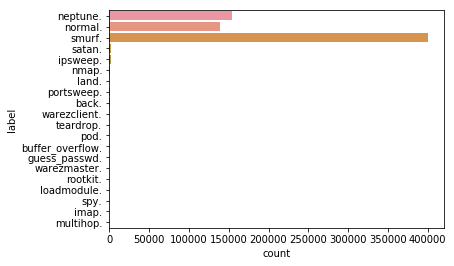

In [199]:
sns_plt = sns.countplot(y=df["label"])


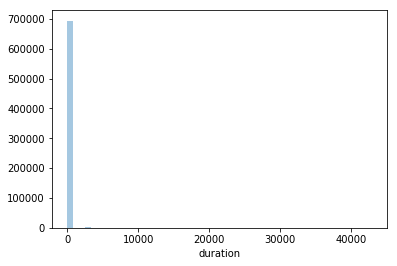

In [200]:
sns_plt = sns.distplot(df["duration"], kde=False)


In [201]:
# df['duration'].value_counts()

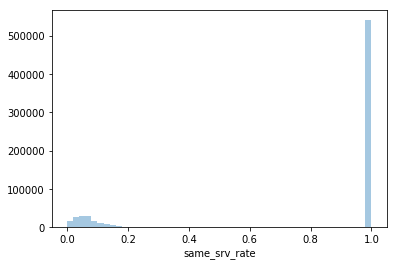

In [202]:
sns_plt = sns.distplot(df["same_srv_rate"], kde=False)


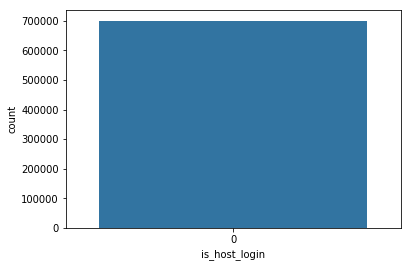

In [203]:
sns_plt = sns.countplot(x=df["is_host_login"])


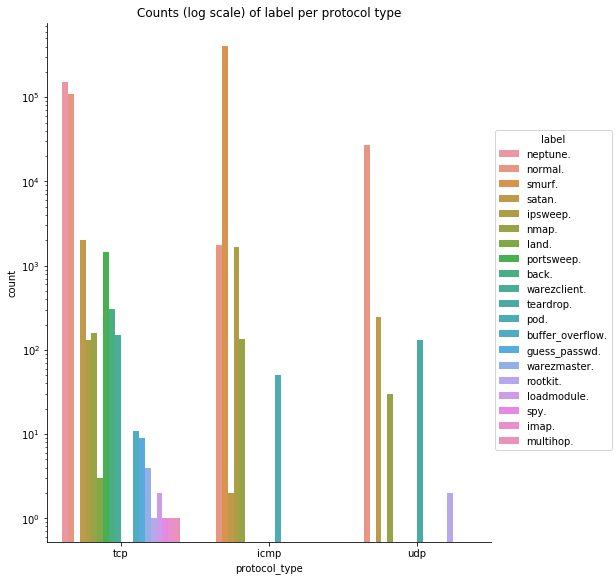

In [206]:
g = sns.factorplot(x='protocol_type', 
                         hue='label',
                         data=df,
                         kind='count',
                         size=8,

                         aspect=.9)

title = ['Counts (log scale) of label per protocol type']
for ax, title in zip(g.axes.flat, title):
    ax.set_title(title)
    ax.set(yscale="log")

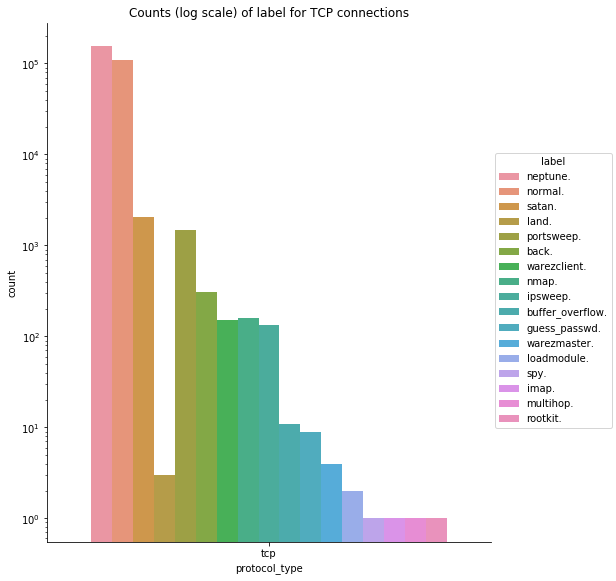

In [218]:
x = 'tcp'
hue = 'label'
col_name = 'protocol_type'
title = ['Counts (log scale) of label for TCP connections']

pltfuncs.log_label_for_connection_plot(df, col_name, x, hue, title)

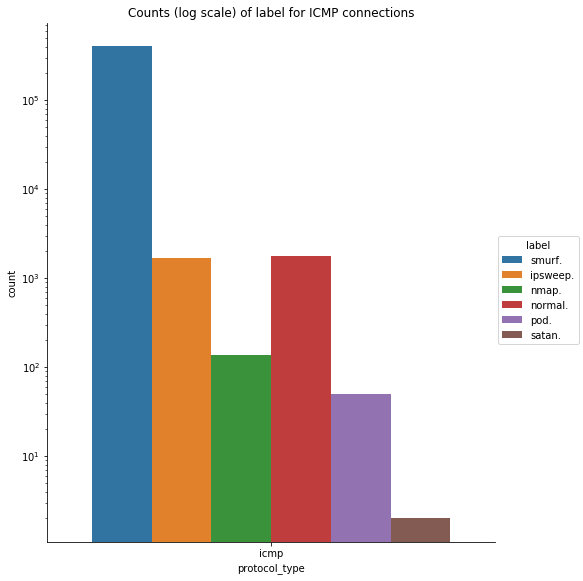

In [219]:
x = 'icmp'
hue = 'label'
col_name = 'protocol_type'
title = ['Counts (log scale) of label for ICMP connections']

pltfuncs.log_label_for_connection_plot(df, col_name, x, hue, title)

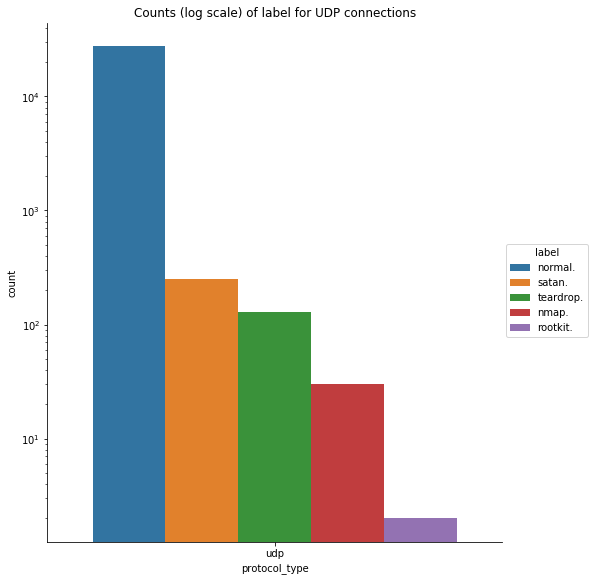

In [220]:
x = 'udp'
hue = 'label'
col_name = 'protocol_type'
title = ['Counts (log scale) of label for UDP connections']
pltfuncs.log_label_for_connection_plot(df, col_name, x, hue, title)

Note the large amount of Smurf attacks over ICMP protocol:

Smurf is a DDOS attack where large numbers of ICMP packets are broadcast to a computer network using the IP's broadcast address.  In the late 1990s, many IP networks would participate in Smurf attacks by responding to ICMP requests. The name comes from the idea of very small, but numerous, attackers overwhelming a much larger opponent 

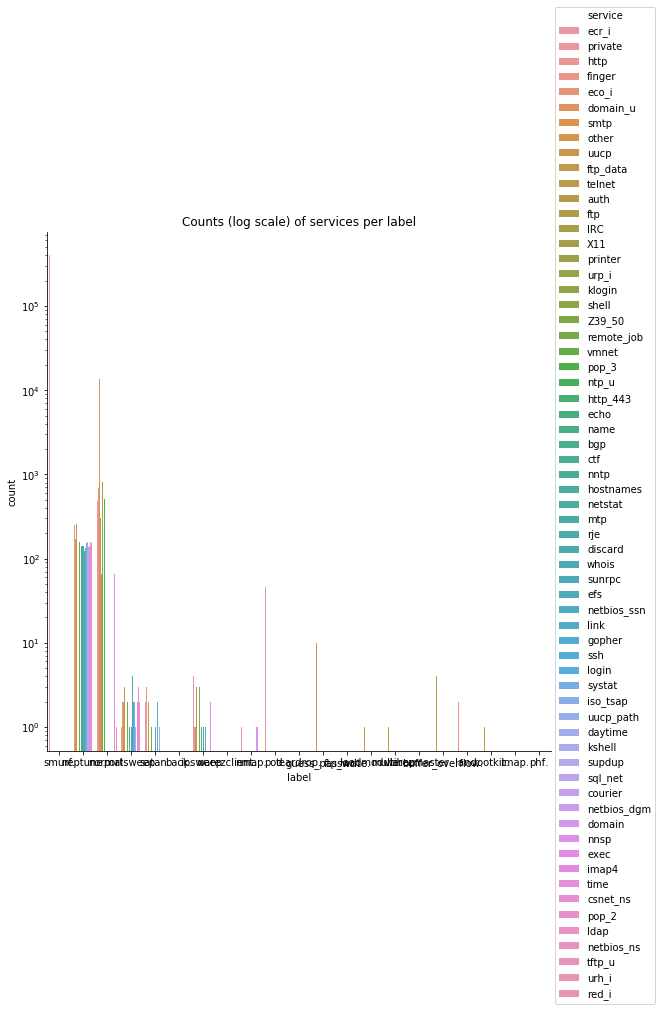

In [95]:
g = sns.factorplot(x='label', 
                   hue='service',
                   data=df,
                   kind='count',
                   size=8,

                   aspect=1)

title = ['Counts (log scale) of services per label']
for ax, title in zip(g.axes.flat, title):
    ax.set_title(title)
    ax.set(yscale="log")

### Categories of Attacks
- normal: (0) no attack occurred

Attacks fall into four main categories:
- probe: (1)surveillance and other probing, e.g., port scanning.
- DOS  : (2) denial-of-service, e.g. syn flood;
- U2R  : (3) unauthorized access to local superuser (root) privileges, e.g., various `buffer overflow` attacks;
- R2L  : (4) unauthorized access from a remote machine, e.g. guessing password;




Additionally, there are attack labels in the Test data that are different from the labels in the Training data.

##### Mapping for Attacks to Categories
(thanks to https://cseweb.ucsd.edu/~elkan/tabulate.html)



##### normal connection


| label   |        |Category #|
|--------|--------|----------|
|normal. | normal |(0)       |


##### attack types in testing data

| label   | Attack Type | Category # |
|--------|-------------|------------|
|apache2. | DOS |(2)| 
|back. | DOS |(2)| 
|buffer_overflow. | U2R |(3)| 
|ftp_write. |  R2L |(4)| 
|guess_passwd. |  R2L |(4)| 
|httptunnel. |  R2L |(4)| 
|httptunnel. | U2R |(3)| 
|imap. |  R2L |(4)| 
|ipsweep. | probe |(1)| 
|land. | DOS |(2)| 
|loadmodule. | U2R |(3)| 
|mailbomb. | DOS |(2)| 
|mscan. | probe |(1)| 
|multihop. |  R2L |(4)| 
|multihop. | U2R |(3)| # duplicate
|named. |  R2L |(4)| 
|neptune. | DOS |(2)| 
|nmap. | probe |(1)| 
|perl. | U2R |(3)| 
|phf. |  R2L |(4)| 
|pod. | DOS |(2)| 
|portsweep. | probe |(1)| 
|processtable. | DOS |(2)| 
|ps. | U2R |(3)| 
|rootkit. | U2R |(3)| 
|saint. | probe |(1)| 
|satan. | probe |(1)| 
|sendmail. |  R2L |(4)| 
|smurf. | DOS |(2)| 
|snmpgetattack. |  R2L |(4)| 
|snmpguess. |  R2L |(4)| 
|sqlattack. | U2R |(3)| 
|teardrop. | DOS |(2)| 
|udpstorm. | DOS |(2)| 
|warezmaster. | DOS |(2)| 
|worm. |  R2L |(4)| 
|xlock. |  R2L |(4)| 
|xsnoop. |  R2L |(4)| 
|xterm. | U2R |(3)|




##### attack types in training data

|label   | Attack Type | Category # |
|--------|-------------|------------|
|back. | DOS |(2)| 
|buffer_overflow. | U2R |(3)| 
|ftp_write. |  R2L |(4)| 
|guess_passwd. |  R2L |(4)| 
|imap. |  R2L |(4)| 
|ipsweep. | probe |(1)| 
|land. | DOS |(2)| 
|loadmodule. | U2R |(3)| 
|multihop. |  R2L |(4)| 
|neptune. | DOS |(2)| 
|nmap. | probe |(1)| 
|perl. | U2R |(3)| 
|phf. |  R2L |(4)| 
|pod. | DOS |(2)| 
|portsweep. | probe |(1)| 
|rootkit. | U2R |(3)| 
|satan. | probe |(1)| 
|smurf. | DOS |(2)| 
|spy. |  R2L |(4)| 
|teardrop. | DOS |(2)| 
|warezclient. |  R2L |(4)| 


## Transforming data

### putting labels into their categories, categorical number
- Normal : 0
- probe: 1
- DOS : 2
- U2R : 3
- R2L : 4

Considering the inconsistency between the test and train data, where multihop is U2R in the former and R2L in the latter, I have opted to consider it as 

In [79]:
# read in label names csv and send it as dictionary to mapping function
label_names = ['label', 'attack_category', 'attack_cat_num']
labels_loc = 'data/categories.csv'
labels_to_categories = pd.read_csv(labels_loc, header=None)
labels_to_categories.columns = label_names
col_name = 'label'
new_col_name = 'attack_category'

df2 = trans.rewrite_values(df, dict(zip(labels_to_categories.label, labels_to_categories.attack_cat_num)), col_name, new_col_name)
df2['label'].unique()

array(['smurf.', 'neptune.', 'normal.', 'portsweep.', 'satan.', 'back.',
       'ipsweep.', 'warezclient.', 'nmap.', 'pod.', 'teardrop.',
       'guess_passwd.', 'ftp_write.', 'loadmodule.', 'multihop.',
       'warezmaster.', 'buffer_overflow.', 'land.', 'rootkit.', 'imap.',
       'phf.'], dtype=object)

In [82]:
df2['attack_category'].value_counts()

2    554744
0    139226
1      5853
4       166
3        11
Name: attack_category, dtype: int64

### changing protocols to categorical number

In [83]:
df2['protocol_type'].value_counts()

icmp    405015
tcp     267024
udp      27961
Name: protocol_type, dtype: int64

In [84]:
column_name = 'protocol_type'
mapping = list(df2[column_name].unique())

df3 = trans.my_create_dummies(df2, mapping, column_name)


In [85]:
df3.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_category,icmp,tcp,udp
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,smurf.,2,1,0,0
1,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,smurf.,2,1,0,0
2,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.0,0.0,1.0,1.0,neptune.,2,0,1,0
3,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,1.0,1.0,0.0,0.0,neptune.,2,0,1,0
4,0,tcp,http,SF,196,76191,0,0,0,0,...,0.03,0.0,0.0,0.0,0.0,normal.,0,0,1,0


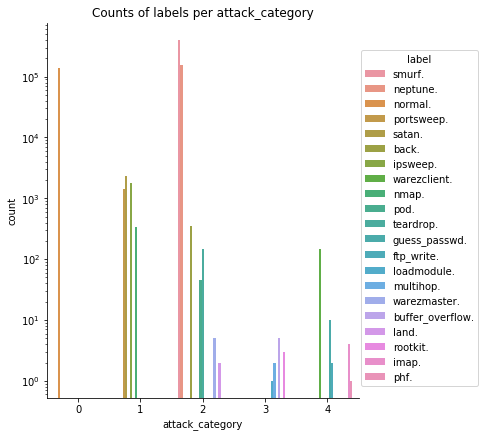

In [93]:
# split labels into separate plots per attack category
g = sns.factorplot(x='attack_category', 
                         hue='label',
                         data=df3,
                         kind='count',
                         size=6,

                         aspect=.9
                        )
title = ['Counts (log scale) of labels per attack_category']
for ax, title in zip(g.axes.flat, title):
    ax.set_title(title)
    ax.set(yscale="log")

```
Normal : 0
probe: 1
DOS : 2
U2R : 3
R2L : 4
```

TODO: create plots of services per attack category

**Counts of labels per attack category**

In [87]:
# Normal, category 0, indicates no attack
attack_cat0 = df3[(df3.attack_category == 0)]
attack_cat0['label'].value_counts()

normal.    139226
Name: label, dtype: int64

In [88]:
print('Probe : category 1')
attack_cat1 = df3[(df3.attack_category == 1)]
attack_cat1['label'].value_counts()

Probe : category 1


satan.        2296
ipsweep.      1770
portsweep.    1449
nmap.          338
Name: label, dtype: int64

In [89]:
print('DOS (Denial of Service) : category 2')
attack_cat2 = df3[(df3.attack_category == 2)]
attack_cat2['label'].value_counts()

DOS (Denial of Service) : category 2


smurf.          401311
neptune.        152889
back.              345
teardrop.          146
pod.                46
warezmaster.         5
land.                2
Name: label, dtype: int64

In [99]:
print('U2R (Unauthorized access to root) : category 3')
attack_cat3 = df3[(df3.attack_category == 3)]
attack_cat3['label'].value_counts()

U2R (Unauthorized access to root) : category 3


buffer_overflow.    5
rootkit.            3
multihop.           2
loadmodule.         1
Name: label, dtype: int64

In [91]:
print('R2L (Unauthorized access from remote machine) : category 4')
attack_cat4 = df3[(df3.attack_category == 4)]
attack_cat3['label'].value_counts()

R2L (Unauthorized access from remote machine) : category 4


buffer_overflow.    5
rootkit.            3
multihop.           2
loadmodule.         1
Name: label, dtype: int64

## Hypothesis Testing

#### Question: Are the proportions of connections that are attacks ( that fall into the attack category, not normal) consistent across protocol types?
- recall that `normal.` is not an attack.
- we will use the general category to get counts

From the graphics above, it seems likely that ICMP garners a higher proportion of attacks than TCP or UDP. We can perform a chi-squared test for proportions to check if there is a statistical difference.

- H0: the proportion of connections that are attacks is not significantly different between ICMP and TCP
- HA: the proportion of connections that are attacks is significantly different betwwen ICMP and TCP
- ALPHA = 0.05
- df = 1

**If chi-squared is greater than 5.99, reject H0**

**Determine the proportion of attacks/connection for each protocol_type**


In [162]:
print('total sample size: {}'.format(len(df3)))

# Set alpha
alpha = 0.05

total sample size: 700000


In [149]:
df3_icmp = df3[(df3.protocol_type == 'icmp')]
print('Number of ICMP Connections: {}'.format(len(df3_icmp)))
icmp_obs_attacks = len(df3_icmp[(df3_icmp.attack_category != 0)])
print('Number of Attacks: {}'.format(icmp_obs_attacks))
icmp_obs_normal = len(df3_icmp[(df3_icmp.attack_category == 0)])
print('Number Normal: {}'.format(icmp_obs_normal))

print('Cat   Count')
print(df3_icmp['attack_category'].value_counts())

Number of ICMP Connections: 405015
Number of Attacks: 403144
Number Normal: 1871
Cat   Count
2    401357
0      1871
1      1787
Name: attack_category, dtype: int64


In [150]:
df3_tcp = df3[(df3.protocol_type == 'tcp')]
print('Number of TCP Connections: {}'.format(len(df3_tcp)))
tcp_obs_attacks = len(df3_tcp[(df3_tcp.attack_category != 0)])
print('Number of Attacks: {}'.format(tcp_obs_attacks))
tcp_obs_normal = len(df3_tcp[(df3_tcp.attack_category == 0)])
print('Number Normal: {}'.format(tcp_obs_normal))
print('Cat   Count')
print(df3_tcp['attack_category'].value_counts())

Number of TCP Connections: 267024
Number of Attacks: 157173
Number Normal: 109851
Cat   Count
2    153241
0    109851
1      3756
4       166
3        10
Name: attack_category, dtype: int64


In [151]:
# for later
df3_udp = df3[(df3.protocol_type == 'udp')]
print('Number of UDP Connections: {}'.format(len(df3_udp)))
print('Number of Attacks: {}'.format(len(df3_udp[(df3_udp.attack_category != 0)])))
print('Cat   Count')
print(df3_udp['attack_category'].value_counts())

Number of UDP Connections: 27961
Number of Attacks: 457
Cat   Count
0    27504
1      310
2      146
3        1
Name: attack_category, dtype: int64


**perform chi-square test**

In [152]:
from scipy.stats import chi2_contingency

# 
obs = np.array([[icmp_obs_attacks, icmp_obs_normal],[tcp_obs_attacks, tcp_obs_normal]])
chi2, p, dof, expected = chi2_contingency(obs)

In [163]:
print('total sample size: {}'.format(len(df3)))

if p < alpha:
    print('Reject H0, there is a significant difference in attack/connection proportion between ICMP and TCP ')
else:
    print('No significant difference between attack/connection proportion between ICMP and TCP ')
    
print('    chi-square\ntest statistic: {}\np-value       : {}\ndeg of freedom: {}\n'.format(chi2, p, dof))
print('Expected: \n{}'.format(expected))

total sample size: 700000
Reject H0, there is a significant difference in attack/connection proportion between ICMP and TCP 
    chi-square
test statistic: 192103.57339709328
p-value       : 0.0
deg of freedom: 1

Expected: 
[[337683.9584533  67331.0415467]
 [222633.0415467  44390.9584533]]


## Notes from standup

- split data into "this" and "everything else"
    - in compsec, connection records are specific to the outcome, so don't train with multiple outcomes
    
- 1 vs all model, different model for each category

- proportion of target vs everything else
- pairplots on all linear variables
- correlation matrix